In [1]:
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
import pickle
from sklearn.ensemble import RandomForestRegressor

In [3]:
#protein and compound feature vector file
ecfp4 = pd.read_csv("../storage/ECFP4.tsv",sep="\t")  #compound

In [4]:
#train dataset
df_tr = pd.read_csv("../storage/traincomps.tsv",sep="\t")

In [5]:
#train dataset with protein-compound feature vectors
df = df_tr.merge(ecfp4,on="compound_id")

In [6]:
df.head()

,compound_id,target_id,pchembl_value,ECFP4.1,ECFP4.2,ECFP4.3,ECFP4.4,ECFP4.5,ECFP4.6,ECFP4.7,...,ECFP4.1015,ECFP4.1016,ECFP4.1017,ECFP4.1018,ECFP4.1019,ECFP4.1020,ECFP4.1021,ECFP4.1022,ECFP4.1023,ECFP4.1024
0,CHEMBL1000,Q02763,4.05,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL100076,P12931,5.40,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL100172,P12931,8.01,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,CHEMBL100174,P35968,6.82,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL100305,P09619,4.96,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df.shape

(87769, 1027)

In [8]:
# keep some as test set
train = df.iloc[:60000,:]
test = df.iloc[60000:,:]
train.shape, test.shape

((60000, 1027), (27769, 1027))

In [2]:
sequences = pd.read_csv('../storage/seq_data.csv', index_col='Unnamed: 0')

In [3]:
sequences.head()

,target_id,Sequence
0,P06213,MATGGRRGAAAAPLLVAVAALLLGAAGHLYPGEVCPGMDIRNNLTR...
1,P78368,MDFDKKGGKGETEEGRRMSKAGGGRSSHGIRSSGTSSGVLMVGPNF...
2,Q9H2K8,MRKGVLKDPEIADLFYKDDPEELFIGLHEIGHGSFGAVYFATNAHT...
3,P49336,MDYDFKVKLSSERERVEDLFEYEGCKVGRGTYGHVYKAKRKDGKDD...
4,Q6DT37,MERRLRALEQLARGEAGGCPGLDGLLDLLLALHHELSSGPLRRERS...


In [ ]:
import sys
sys.path

In [ ]:
sys.path.append("/notebooks/bio_embeddings")

In [ ]:
from bio_embeddings import Word2VecEmbedder, TransformerXLEmbedder
from bio_embeddings import FastTextEmbedder, GloveEmbedder

In [ ]:
embedders = []

embedders.append(Word2VecEmbedder())
embedders.append(FastTextEmbedder())
embedders.append(GloveEmbedder())
embedders.append(TransformerXLEmbedder())

In [4]:
seqlist = [x for x in sequences.Sequence.values]
len(seqlist), sequences.shape

(204, (204, 2))

In [5]:
seqlist[0]

'MATGGRRGAAAAPLLVAVAALLLGAAGHLYPGEVCPGMDIRNNLTRLHELENCSVIEGHLQILLMFKTRPEDFRDLSFPKLIMITDYLLLFRVYGLESLKDLFPNLTVIRGSRLFFNYALVIFEMVHLKELGLYNLMNITRGSVRIEKNNELCYLATIDWSRILDSVEDNYIVLNKDDNEECGDICPGTAKGKTNCPATVINGQFVERCWTHSHCQKVCPTICKSHGCTAEGLCCHSECLGNCSQPDDPTKCVACRNFYLDGRCVETCPPPYYHFQDWRCVNFSFCQDLHHKCKNSRRQGCHQYVIHNNKCIPECPSGYTMNSSNLLCTPCLGPCPKVCHLLEGEKTIDSVTSAQELRGCTVINGSLIINIRGGNNLAAELEANLGLIEEISGYLKIRRSYALVSLSFFRKLRLIRGETLEIGNYSFYALDNQNLRQLWDWSKHNLTITQGKLFFHYNPKLCLSEIHKMEEVSGTKGRQERNDIALKTNGDQASCENELLKFSYIRTSFDKILLRWEPYWPPDFRDLLGFMLFYKEAPYQNVTEFDGQDACGSNSWTVVDIDPPLRSNDPKSQNHPGWLMRGLKPWTQYAIFVKTLVTFSDERRTYGAKSDIIYVQTDATNPSVPLDPISVSNSSSQIILKWKPPSDPNGNITHYLVFWERQAEDSELFELDYCLKGLKLPSRTWSPPFESEDSQKHNQSEYEDSAGECCSCPKTDSQILKELEESSFRKTFEDYLHNVVFVPRKTSSGTGAEDPRPSRKRRSLGDVGNVTVAVPTVAAFPNTSSTSVPTSPEEHRPFEKVVNKESLVISGLRHFTGYRIELQACNQDTPEERCSVAAYVSARTMPEAKADDIVGPVTHEIFENNVVHLMWQEPKEPNGLIVLYEVSYRRYGDEELHLCVSRKHFALERGCRLRGLSPGNYSVRIRATSLAGNGSWTEPTYFYVTDYLDVPSNIAKIIIGPLIFVFLFSVVIGSIYLFLRKRQPDGPLGPLYASSNPEY

In [ ]:
embeddings = []
for embedder in embedders:
    embeds = [embedder.embed(x) for x in seqlist]
    embeddings.append(embeds)

In [ ]:
len(embeddings[3][])

In [ ]:
word2vec = pd.DataFrame(embeddings[0])

In [ ]:
i = 0
for value in word2vec[0].values:
    print(len(value))
    i +=1
    if i == 10:
        break
    

# SGT embeddings

In [ ]:
seqlist = [list(x) for x in sequences.Sequence.values]

In [ ]:
print(seqlist[0])

In [ ]:
from sgt import Sgt

sgt = Sgt(kappa=10, lengthsensitive = False)
embedding = sgt.fit_transform(corpus=seqlist)

In [ ]:
len(embedding)

In [ ]:
for i in range(10):
    print(len(embedding[i]))
    

In [ ]:
encode = pd.DataFrame(embedding)

In [ ]:
encode.head()

In [ ]:
protdata = pd.concat([sequences, encode], axis=1)
protdata.head()

In [ ]:
protdata.drop('Sequence', inplace=True, axis=1)

In [ ]:
protdata.head()

In [ ]:
protdata.to_csv('sgt_embeds.csv')

In [6]:
df = pd.read_csv("../storage/k-sep_normalized.tsv",sep="\t")

In [7]:
df.set_index('target_id', inplace=True)

In [8]:
df.head()

,k_separated_bigrams_pssm0,k_separated_bigrams_pssm1,k_separated_bigrams_pssm2,k_separated_bigrams_pssm3,k_separated_bigrams_pssm4,k_separated_bigrams_pssm5,k_separated_bigrams_pssm6,k_separated_bigrams_pssm7,k_separated_bigrams_pssm8,k_separated_bigrams_pssm9,...,k_separated_bigrams_pssm390,k_separated_bigrams_pssm391,k_separated_bigrams_pssm392,k_separated_bigrams_pssm393,k_separated_bigrams_pssm394,k_separated_bigrams_pssm395,k_separated_bigrams_pssm396,k_separated_bigrams_pssm397,k_separated_bigrams_pssm398,k_separated_bigrams_pssm399
target_id,,,,,,,,,,,,,,,,,,,,,
Q13547,0.107481,0.128812,0.081213,0.140111,0.071316,0.081507,0.108822,0.121666,0.136102,0.108295,...,0.074321,0.058263,0.069988,0.047662,0.078000,0.069114,0.052984,0.067934,0.042231,0.041590
Q9BY41,0.094796,0.100401,0.057654,0.091992,0.059848,0.054790,0.071760,0.115063,0.110756,0.108940,...,0.081027,0.031006,0.065345,0.045518,0.050494,0.050698,0.038563,0.048614,0.040782,0.043202
Q92831,0.131170,0.159737,0.141817,0.167542,0.107332,0.153498,0.148839,0.099001,0.139122,0.134053,...,0.078303,0.107104,0.099013,0.135464,0.116718,0.107386,0.083731,0.066814,0.092070,0.055836
Q09472,0.302940,0.411045,0.540288,0.382354,0.289143,0.973024,0.295314,0.471003,0.588330,0.298683,...,0.189828,0.229511,0.469584,0.173613,0.564296,0.341439,0.230679,0.151048,0.150616,0.138093
Q92793,0.306003,0.410826,0.553786,0.369167,0.289833,1.000000,0.291937,0.479004,0.580453,0.305651,...,0.191415,0.227153,0.470394,0.169796,0.592787,0.344472,0.226170,0.147799,0.157863,0.137990


In [9]:
%matplotlib inline

import numpy
import numpy.linalg
import pandas
import scipy.cluster.hierarchy
import sklearn
import sklearn.cluster
import sklearn.linear_model
import re
import matplotlib.pyplot

{'icoord': [[35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [15.0, 15.0, 32.5, 32.5],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [23.75, 23.75, 62.5, 62.5],
  [5.0, 5.0, 43.125, 43.125],
  [85.0, 85.0, 95.0, 95.0],
  [105.0, 105.0, 115.0, 115.0],
  [90.0, 90.0, 110.0, 110.0],
  [24.0625, 24.0625, 100.0, 100.0],
  [145.0, 145.0, 155.0, 155.0],
  [135.0, 135.0, 150.0, 150.0],
  [125.0, 125.0, 142.5, 142.5],
  [185.0, 185.0, 195.0, 195.0],
  [175.0, 175.0, 190.0, 190.0],
  [165.0, 165.0, 182.5, 182.5],
  [205.0, 205.0, 215.0, 215.0],
  [225.0, 225.0, 235.0, 235.0],
  [210.0, 210.0, 230.0, 230.0],
  [173.75, 173.75, 220.0, 220.0],
  [133.75, 133.75, 196.875, 196.875],
  [62.03125, 62.03125, 165.3125, 165.3125],
  [265.0, 265.0, 275.0, 275.0],
  [255.0, 255.0, 270.0, 270.0],
  [245.0, 245.0, 262.5, 262.5],
  [305.0, 305.0, 315.0, 315.0],
  [295.0, 295.0, 310.0, 310.0],
  [285.0, 285.0, 302.5, 302.5],
  [325.0, 325.0, 335.0, 335.0],
  [355.0, 355.0, 365.0, 365.0],
  [3

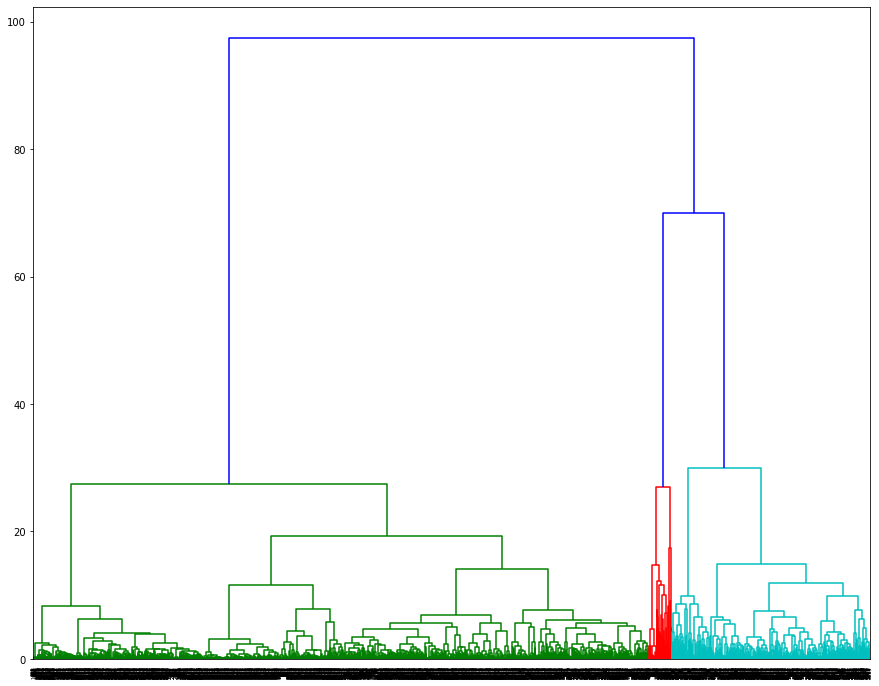

In [12]:
plt.figure(figsize=(15,12))
result=matplotlib.pyplot.gca()
scipy.cluster.hierarchy.dendrogram(scipy.cluster.hierarchy.ward(df),ax=result)


In [13]:
clusters=sklearn.cluster.AgglomerativeClustering(n_clusters=3,
                                                         memory='/tmp')
protein_clusters=pandas.DataFrame(clusters.fit_predict(df),
                                               index=df.index,
                                               columns=['cluster'])
protein_clusters

,cluster
target_id,
Q13547,1
Q9BY41,1
Q92831,0
Q09472,2
Q92793,2
Q92830,0
Q9WVG6,1
O15379,1
Q9UBN7,0


In [14]:
protein_clusters.to_csv('pssm_pro_cluster.csv')